<a href="https://colab.research.google.com/github/mvicchow/learning-ai/blob/main/DCNN_with_LeNet_5_Architecture_on_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Installation

In [1]:
!pip install -q visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 10.6 MB/s eta 0:00:00


# Import Library

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
import visualkeras

# Load Dataset

In [3]:
# Loading dataset from sklearn
mnist = fetch_openml('mnist_784', version=1, cache=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


--> Input shape nya 28 x 28 x 1, yang artinya width dan height dari image nya adalah 28 pixels dengan 1 channel warna

In [4]:
copy_mnist = mnist.copy()

# Normalization

In [5]:
# Checking the max value untuk setiap pixels dalam setiap images
copy_mnist["data"].max().max()

255.0

In [6]:
copy_mnist["data"].min().min()

0.0

Nilai min dan max pada data merepresentasikan value dari warna yang ada pada setiap pixel untuk suatu channel pada gambar yang biasanya rentang 0-255. Namun Untuk mempercepat proses komputasi yang kita lakukan dan juga menghemat ruang penyimpanan maka kita akan melakukan normalisasi, sehingga nilai warna dari setiap pixel berada pada rentang 0 sampai 1. (mencegah terjadinya perhitungan yang berlebihan)

In [7]:
copy_mnist["data"] /= 255.

In [8]:
copy_mnist["data"].max().max()

1.0

In [9]:
copy_mnist["data"].min().min()

0.0

sekarang nilai nya sudah ternormalisasikan menjadi diantara 0 sampai 1.

# Reshaping data

Karena data yang diambil dari sklearn berupa dataframe 2 dimensi, dimana hanya merepresentasikan value untuk setiap pixels yang telah di flatten dari setiap field gambar.

Dataset MNIST yang dimiliki mempunyai 784 columns, dimana sebenarnya data image MNIST merupakan data image 28x28

Reshaping dilakukan agar dapat feed data image ke layer Convolutional 2 dimensi yang membutuhkan input 4 dimensi yang mana terdiri dari (N, H, W, C), dimana N merupakan batch size yang dimiliki, H merupakan tinggi dari gambar, W merupakan lebar dari gambar, dan C merupakan jumlah channel yang ada pada gambar.

In [10]:
copy_mnist["data"].shape

(70000, 784)

In [11]:
copy_mnist["data"] = copy_mnist["data"].to_numpy().reshape(-1, 28, 28,1)

In [12]:
copy_mnist["data"].shape

(70000, 28, 28, 1)

Selain agar data kita dapat di terima oleh layer Conv2D, hal ini juga memungkinkan agar dapat memvisualisasikan sample data yang dimiliki oleh data pada saat menggunakan imread

In [13]:
copy_mnist["target"][8]

'1'

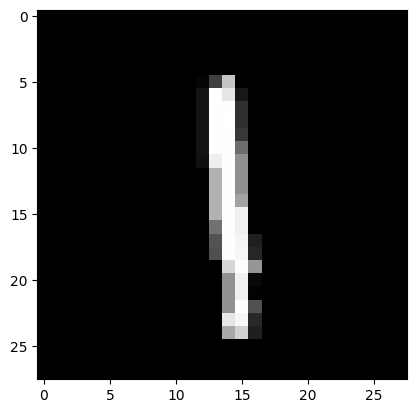

In [14]:
plt.imshow(copy_mnist["data"][8], cmap="gray")
plt.show()

# Convert label to categorical

Merubah bentuk data dari label menjadi distribusi probability, karena disini kita akan melakukan multiclass classification agar nantinya model dapat predict probabilities untuk setiap class yang ada.

In [15]:
copy_mnist["target"].shape

(70000,)

In [16]:
copy_mnist["target"] = to_categorical(copy_mnist["target"])

In [17]:
copy_mnist["target"].shape

(70000, 10)

# Splitting training and testing dataset

In [35]:
X_train, X_test, y_train, y_test = train_test_split(copy_mnist["data"], copy_mnist["target"], test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Modelling

https://en.wikipedia.org/wiki/LeNet

LeNet-5 terdiri dari 7 layer

In [36]:
#param
input_shape = X_train[0].shape

# Model
model = Sequential([
    Input(shape=input_shape),

    layers.Conv2D(6, (5,5), activation="sigmoid", padding="same"),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(16, (5,5), activation="sigmoid"),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),

    layers.Dense(120, activation="sigmoid"),
    layers.Dense(84, activation="sigmoid"),

    layers.Dense(10, activation="softmax"),
])

# Model compilation

In [37]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

# Training Model

In [39]:
EPOCHS = 10

tf.random.set_seed(42)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, verbose=1)

Epoch 1/10
1532/1532 [==============================] - 11s 6ms/step - loss: 0.8033 - accuracy: 0.7421 - val_loss: 0.1801 - val_accuracy: 0.9473
Epoch 2/10
1532/1532 [==============================] - 8s 5ms/step - loss: 0.1299 - accuracy: 0.9610 - val_loss: 0.1093 - val_accuracy: 0.9679
Epoch 3/10
1532/1532 [==============================] - 8s 5ms/step - loss: 0.0858 - accuracy: 0.9738 - val_loss: 0.0935 - val_accuracy: 0.9702
Epoch 4/10
1532/1532 [==============================] - 8s 5ms/step - loss: 0.0672 - accuracy: 0.9788 - val_loss: 0.0839 - val_accuracy: 0.9744
Epoch 5/10
1532/1532 [==============================] - 8s 5ms/step - loss: 0.0553 - accuracy: 0.9831 - val_loss: 0.0663 - val_accuracy: 0.9800
Epoch 6/10
1532/1532 [==============================] - 8s 5ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0670 - val_accuracy: 0.9797
Epoch 7/10
1532/1532 [==============================] - 8s 5ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0567 - val_accuracy

# Model Evaluation

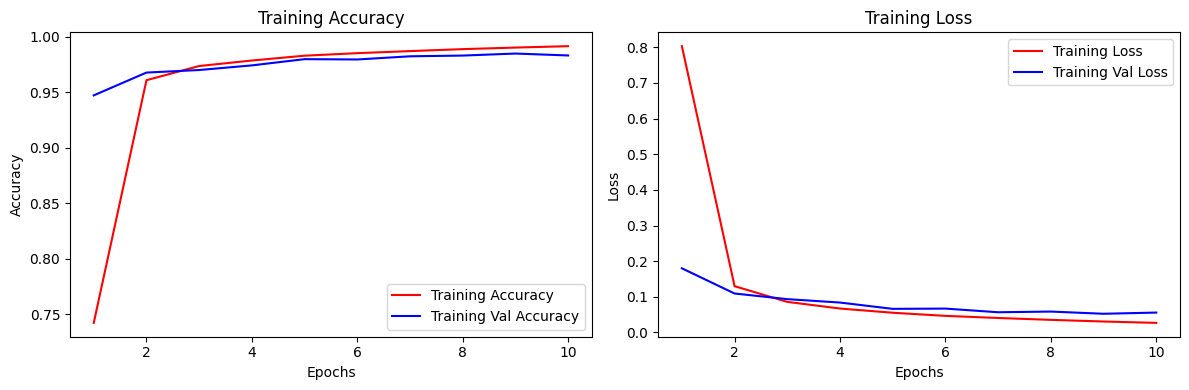

In [40]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plot training accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Training Val Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Training Val Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
score = model.evaluate(X_test, y_test)

329/329 [==============================] - 1s 3ms/step - loss: 0.0455 - accuracy: 0.9853


In [42]:
score

[0.04547519609332085, 0.9853333234786987]

# Save model's parameters

In [53]:
# model.save_weights('./model_checkpoint/')
# model.load_weights('./model_checkpoint/')


In [44]:
model.predict(X_test[5].reshape(-1,28,28,1)).argmax()

1/1 [==============================] - 0s 73ms/step


5

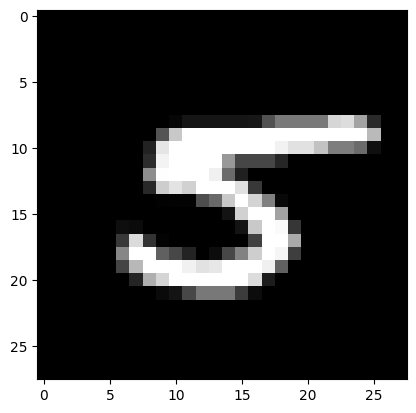

In [45]:
plt.imshow(X_test[5], cmap="gray")

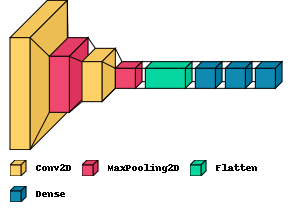

In [50]:
visualkeras.layered_view(model, legend=True)